# Identifying potential credit card defaulters for assisting risk advisory procedures

## Table of Contents

1. [Introduction](#1)<br>
2. [Importing and exploring dataset](#2)<br>
3. [Data Cleaning](#3)<br>
4. [Exploratory Data Analysis](#4)<br>
5. [Data Preparation](#5)<br>
6. [Model development, evaluation and tuning](#6)<br>
7. [Conclusion](#7)<br>

<a id="1"></a>
## 1. Introduction

The aim of this repository is to create a classifier to predict whether or not a current credit card holder or an applicant will default. This not only will help banks to reject the applications of the potential defaulters with more confidence but will also identify the defaulters for next month amongst current customers and help to reduce the turn around time spent in debt collection service.

Credit card holders across US started 2020 owing more than 1 trillion USD in credit card debt after a 76.7 billion net increase during 2019. Consumers quickly changed course, however, posting the biggest first-quarter credit card debt paydown ever, at 60 billion USD. That indicates U.S. consumers were on pace for one of their best years before the COVID-19 pandemic turned it into one of the worst. WalletHub now projects that U.S. consumers will rack up more than 140 billion USD throughout the rest of 2020, ending the year with a net increase of 80 billion USD in credit card debt.

**In this repository I have:**
- Performed data preparation for 30,000 client’s financial transactions for the past 6 months
- Identified potential defaulters for next month by training supervised learning models
- Applied GridSeachCV hyperparameter tuning to improve the model's Recall and Precision, obtained cross-validation accuracy of 81.7% 
- Modeled a classifier that can assist in risk advisory procedures of the bank to reduce credit card default rate by 25%

In [28]:
#Importing the required libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
from graphviz import Source

import timeit
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,
                             roc_auc_score, roc_curve)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.decomposition import PCA

<a id="2"></a>
## 2. Importing and exploring dataset

In [2]:
df = pd.read_csv('default of credit card clients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### Attribute Information

Below there are the description of the attributes that will be used in our model for better understanding of the data:

* LIMIT_BAL: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.
* SEX: Gender (1 = male; 2 = female).
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
* AGE: Age (year).
* PAY_1: the repayment status in September, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* PAY_2: the repayment status in August, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* PAY_3: the repayment status in July, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* PAY_4: the repayment status in June, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* PAY_5: the repayment status in May, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* PAY_6: the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* BILL_AMT1: Amount of bill statement (NT dollar). Amount of bill statement in September, 2005.
* BILL_AMT2: Amount of bill statement (NT dollar). Amount of bill statement in August, 2005.
* BILL_AMT3: Amount of bill statement (NT dollar). Amount of bill statement in July, 2005.
* BILL_AMT4: Amount of bill statement (NT dollar). Amount of bill statement in June, 2005.
* BILL_AMT5: Amount of bill statement (NT dollar). Amount of bill statement in May, 2005.
* BILL_AMT6: Amount of bill statement (NT dollar). Amount of bill statement in April, 2005.
* PAY_AMT1: Amount of previous payment (NT dollar). Amount paid in September, 2005.
* PAY_AMT2: Amount of previous payment (NT dollar). Amount paid in August, 2005.
* PAY_AMT3: Amount of previous payment (NT dollar). Amount paid in July, 2005.
* PAY_AMT4: Amount of previous payment (NT dollar). Amount paid in June, 2005.
* PAY_AMT5: Amount of previous payment (NT dollar). Amount paid in May, 2005.
* PAY_AMT6: Amount of previous payment (NT dollar). Amount paid in June, 2005.
* Default payment next month:(Yes = 1, No = 0)

<a id="3"></a>
## 3. Data Cleaning

In [4]:
# Removing unwanted columns
df = df.drop(['ID'], axis=1)

In [5]:
# Detecting and removing any null values if present
print( "{} null values detected.".format( df.isna().any().sum() ) )

0 null values detected.


In [6]:
# Detecting and removing any null values if present
print( "{} duplicate rows detected.".format( df.duplicated().sum() ) )
df = df.drop_duplicates()

35 duplicate rows detected.


In [7]:
# Merging unlisted category's records into 'Others' category, for all columns
df['MARRIAGE'].replace( 0, 3, inplace = True )
df['EDUCATION'].replace([0,5,6], 4, inplace = True )

<a id="4"></a>
## 4. Exploratory Data Analysis

### 4.1. Preparing new data frame with categorical labels

In [8]:
df_copy = df.copy(deep=True)
df_copy.replace( {'SEX': {1:'Male', 2:'Female'}}, inplace = True )
df_copy.replace( {'EDUCATION' : {1:'Grad school', 2:'University', 3:'High school', 4:'Others'}}, inplace = True )
df_copy.replace( {'MARRIAGE': {1:'Married', 2:'Single', 3:'Others'}}, inplace = True )
df_copy.replace( {'default payment next month': {1:'Default', 0:'Didn\'t default'}}, inplace = True )
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Default
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Default
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Didn't default
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Didn't default
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Didn't default


In [9]:
def plot_pie(groups, title, n):
    
    explode_list = []
    for i in range(n):
        explode_list.append(0.0)
        explode_list.append(0.05)
        
    cmap = sns.diverging_palette(220, 20, sep=n*2, as_cmap=True)
        
    groups.plot(kind='pie', figsize=(10, 8), startangle=90, shadow=True,
                labels=groups.index, autopct='%1.1f%%', pctdistance=0.75,
                cmap= cmap, explode=explode_list ) # 'explode' the defaulters
    plt.title(title, y=1.05, fontsize=25) 
    plt.axis('equal')
    
    plt.show()

### 4.2. Defaulters analysis based on categorical features

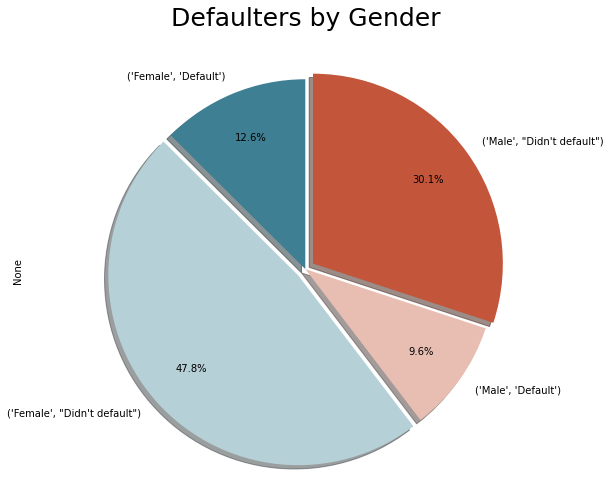

In [10]:
gender_groups = df_copy.groupby(['SEX','default payment next month']).size()
plot_pie(gender_groups, "Defaulters by Gender", 2)

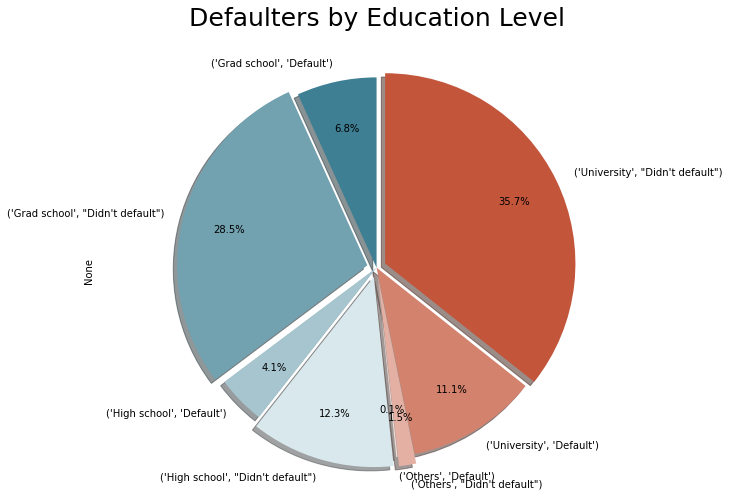

In [11]:
education_groups = df_copy.groupby(['EDUCATION','default payment next month']).size()
plot_pie(education_groups, "Defaulters by Education Level", 4)

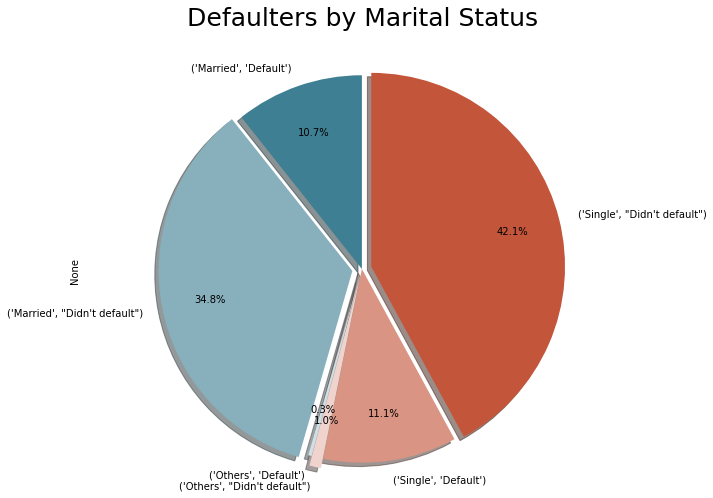

In [12]:
marital_groups = df_copy.groupby(['MARRIAGE','default payment next month']).size()
plot_pie(marital_groups, "Defaulters by Marital Status", 3)

### 4.3. Conclusions made through EDA:
- Male's Default to Didn't default ratio is considerably higher than Female's ratio.
- Surprisingly, students pursuing University education defaults more than the rest. Higher university fees may be the reason.
- It is difficult to judge the defaulters based on their Marital status because it shows a fair pattern.

<a id="5"></a>
## 5. Data preparation

### Checking correlation between variables

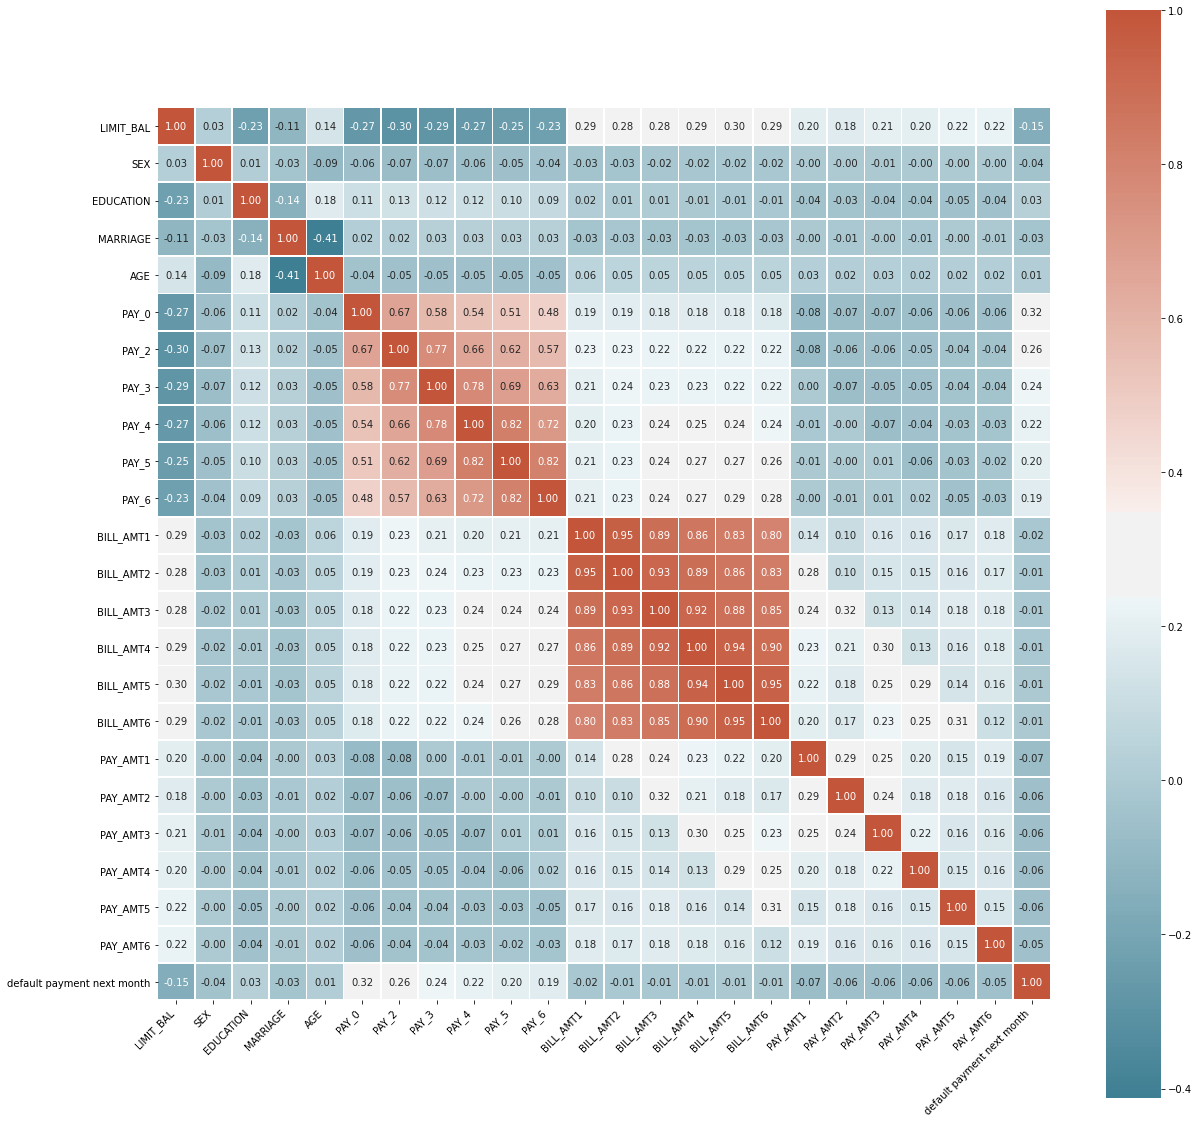

In [13]:
plt.figure(figsize=(20,20))
ax = sns.heatmap( df.corr(), cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True),
                 square=True, annot=True, fmt='.2f', linewidth=0.7 )
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right' );

- Observing the correlation plot above, It is seen that each month of "Repayment Status", "Amount of bill statement", and "Amount of previous payment" are highly correlated with their remaining 5 months.
- Defaulting for the next month is mainly related to the pattern of "Repayment Status" observed over last 6 months.

### Preparing 'labels' to be predicted by training on 'features'

In [14]:
features = df[df.columns[df.columns!='default payment next month']]
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [15]:
labels = df['default payment next month']
labels.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

### Preparing train and test datasets and standardizing:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, stratify=labels)

In [17]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="6"></a>
## 6. Model development, evaluation, and  tuning

In [18]:
def evaluate_model(name, model):
    print("For {}:".format(name))
    
    # Training and predicting, time elapsed
    tic = timeit.default_timer()
    pred = model.fit(X_train,y_train).predict(X_test)
    toc = timeit.default_timer()
    print("\n1. time elapsed: {}".format(timedelta(seconds=toc-tic)))
    
    # Accuracy score, classification report
    print("2. Accuracy_score: {:.5f}".format( accuracy_score(y_test, pred)))
    print("3. Classification report:\n", classification_report(y_test, pred))
    
    # AUC Score
    # # Predicting Probabilities of the positive class only
    probabilities = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probabilities)
    print("4. AUC: {:.5f}".format(auc))
    
    # Confusion Matrix
    print("5.", end="")
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt="d", cmap='Blues');
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Don\'t default', 'Default']); 
    ax.yaxis.set_ticklabels(['Don\'t default', 'Default']);

In [19]:
def do_tuning(classifier, parameters, scores_criteria):
    
    for score in scores_criteria:
        print("# Tuning hyper-parameters for %s" % score)
        clf = GridSearchCV(classifier, parameters, scoring='%s' % score).fit(X_train, y_train)

        print("\nBest parameters set found on development set:")
        print(clf.best_params_)
        
#         print("\nGrid scores on development set:")
#         means = clf.cv_results_['mean_test_score']
#         stds = clf.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#             print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        
        print("\nClassification report for the best parameters:")
        print(classification_report(y_test, clf.predict(X_test)))
        print("----------------------------------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------------------------------")
        print("\n\n")

### 6.1. Logistic Regression

In [20]:
logreg = LogisticRegression(multi_class='auto', random_state=1)

For Logistic Regression:

1. time elapsed: 0:00:00.077653
2. Accuracy_score: 0.80912
3. Classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7001
           1       0.71      0.23      0.35      1989

    accuracy                           0.81      8990
   macro avg       0.76      0.60      0.62      8990
weighted avg       0.79      0.81      0.77      8990

4. AUC: 0.73035
5.

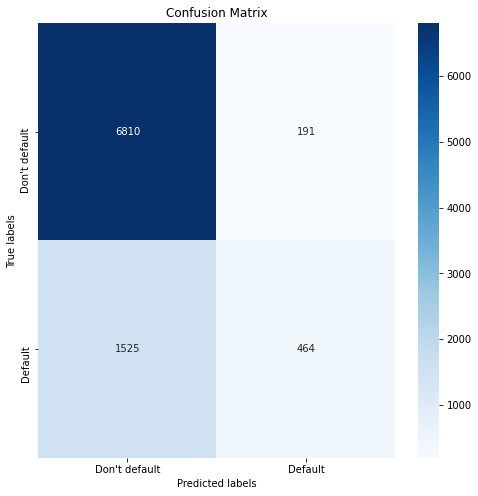

In [21]:
evaluate_model("Logistic Regression", logreg)

### 6.2. Tuned Logistic Regression

In [22]:
lr_classifier = LogisticRegression(multi_class='auto', random_state=1)
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
              'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg'] }
scores = ['accuracy','precision_macro', 'recall_macro']

do_tuning(lr_classifier, parameters, scores)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:
{'C': 0.0001, 'penalty': 'none', 'solver': 'lbfgs'}

Classification report for the best parameters:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7001
           1       0.71      0.23      0.35      1989

    accuracy                           0.81      8990
   macro avg       0.76      0.60      0.62      8990
weighted avg       0.79      0.81      0.77      8990

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification report for the best parameters:
              precision    recall  f1-score   support

           0       0.82      0.97     

For GS Logistic Regression 1:

1. time elapsed: 0:00:00.071638
2. Accuracy_score: 0.80912
3. Classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7001
           1       0.71      0.23      0.35      1989

    accuracy                           0.81      8990
   macro avg       0.76      0.60      0.62      8990
weighted avg       0.79      0.81      0.77      8990

4. AUC: 0.73035
5.

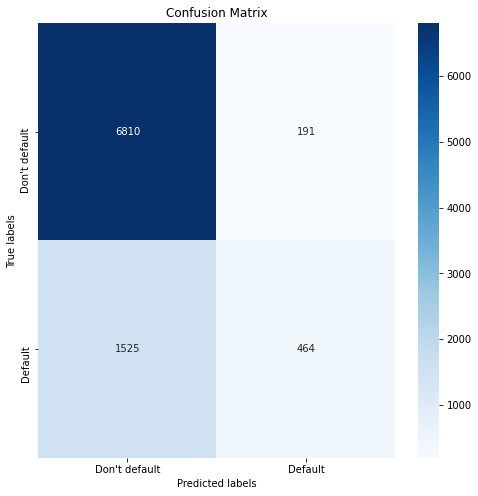

In [23]:
tuned_logreg = LogisticRegression(multi_class='auto', random_state=1, C=1.0, penalty='l2', solver='lbfgs')
evaluate_model("GS Logistic Regression 1", tuned_logreg)

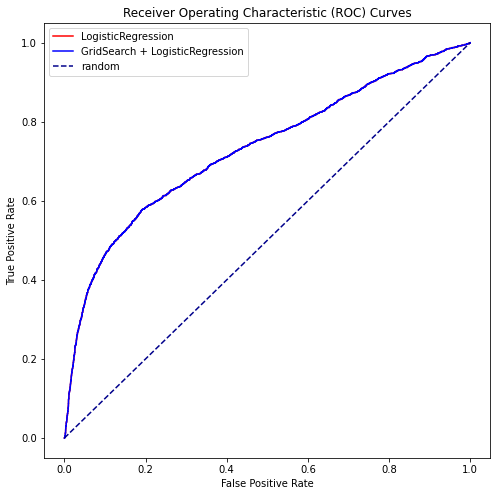

In [24]:
# ROC curves.
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
tuned_logreg_fpr, tuned_logreg_tpr, tuned_logreg_thresholds = roc_curve(y_test, tuned_logreg.predict_proba(X_test)[:, 1])

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(logreg_fpr, logreg_tpr, color='red', label='LogisticRegression')
plt.plot(tuned_logreg_fpr, tuned_logreg_tpr, color='blue', label='GridSearch + LogisticRegression')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

### 6.3. Decision Tree

In [25]:
dt = tree.DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=1)

For Decision Tree:

1. time elapsed: 0:00:00.107351
2. Accuracy_score: 0.81858
3. Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7001
           1       0.68      0.34      0.45      1989

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.67      8990
weighted avg       0.80      0.82      0.79      8990

4. AUC: 0.74166
5.

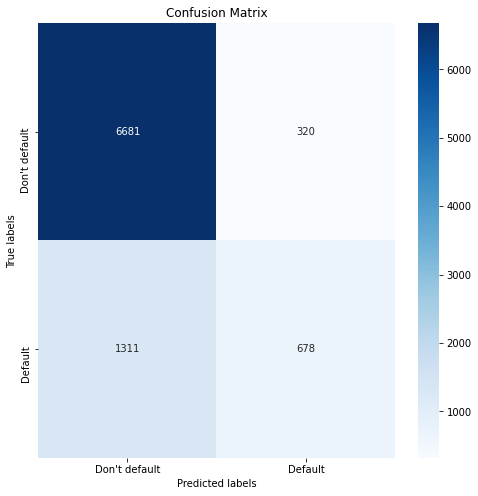

In [30]:
evaluate_model("Decision Tree", dt)

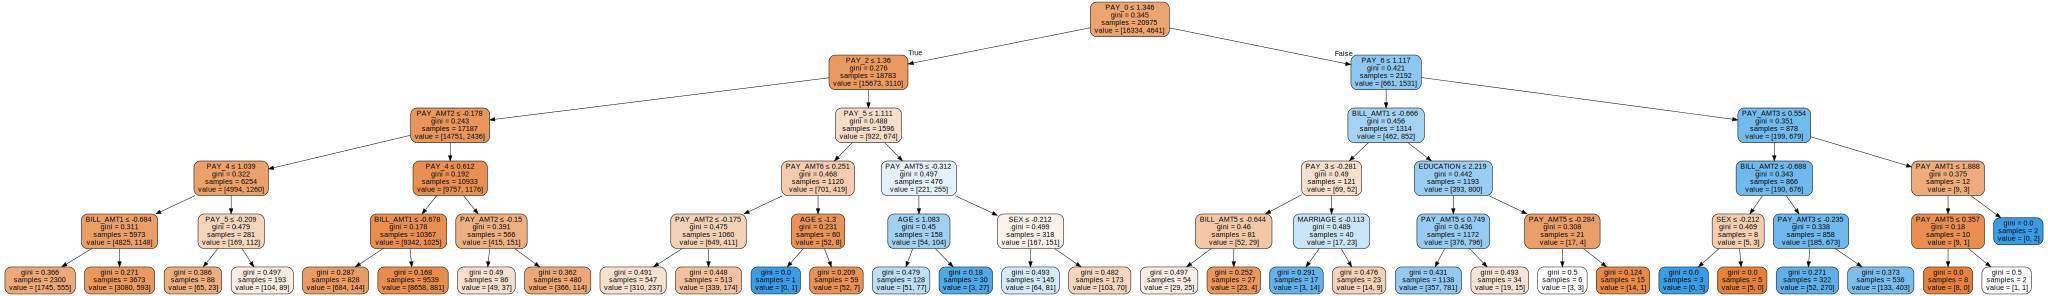

In [31]:
# Plot the tree.
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=features.columns.tolist(), filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [32]:
# Print the tree in a simplified version.
dt_text = export_text(dt, feature_names=features.columns.tolist())
print(dt_text)

|--- PAY_0 <= 1.35
|   |--- PAY_2 <= 1.36
|   |   |--- PAY_AMT2 <= -0.18
|   |   |   |--- PAY_4 <= 1.04
|   |   |   |   |--- BILL_AMT1 <= -0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BILL_AMT1 >  -0.68
|   |   |   |   |   |--- class: 0
|   |   |   |--- PAY_4 >  1.04
|   |   |   |   |--- PAY_5 <= -0.21
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_5 >  -0.21
|   |   |   |   |   |--- class: 0
|   |   |--- PAY_AMT2 >  -0.18
|   |   |   |--- PAY_4 <= 0.61
|   |   |   |   |--- BILL_AMT1 <= -0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BILL_AMT1 >  -0.68
|   |   |   |   |   |--- class: 0
|   |   |   |--- PAY_4 >  0.61
|   |   |   |   |--- PAY_AMT2 <= -0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_AMT2 >  -0.15
|   |   |   |   |   |--- class: 0
|   |--- PAY_2 >  1.36
|   |   |--- PAY_5 <= 1.11
|   |   |   |--- PAY_AMT6 <= 0.25
|   |   |   |   |--- PAY_AMT2 <= -0.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_AMT2 >  

### 6.4. Tuned Decision Tree

In [33]:
dt_classifier = tree.DecisionTreeClassifier(random_state=1)
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,3,4,5,6,7,8,9,10,11,12] }
scores = ['accuracy','precision_macro', 'recall_macro']

do_tuning(dt_classifier, parameters, scores)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4}

Classification report for the best parameters:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7001
           1       0.69      0.33      0.45      1989

    accuracy                           0.82      8990
   macro avg       0.76      0.64      0.67      8990
weighted avg       0.80      0.82      0.79      8990

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4}

Classification report for the best parameters:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7001
        

For Tuned Decision Tree:

1. time elapsed: 0:00:00.135721
2. Accuracy_score: 0.81891
3. Classification report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7001
           1       0.69      0.33      0.45      1989

    accuracy                           0.82      8990
   macro avg       0.76      0.64      0.67      8990
weighted avg       0.80      0.82      0.79      8990

4. AUC: 0.74014
5.

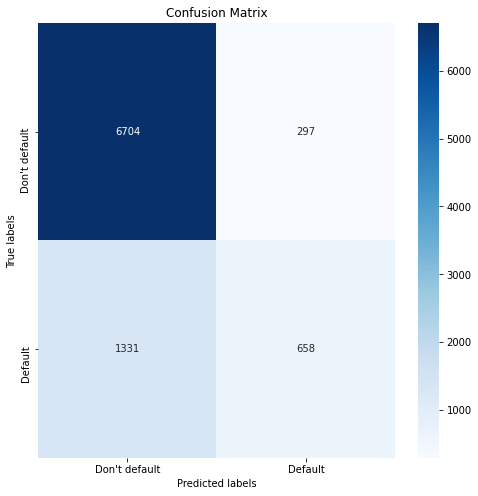

In [34]:
tuned_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
evaluate_model("Tuned Decision Tree", tuned_dt)

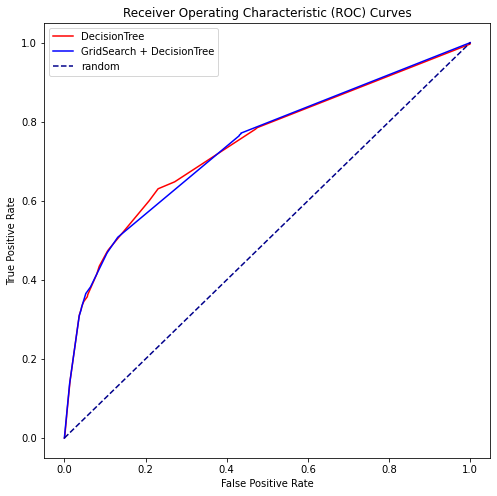

In [35]:
#ROC Curves.
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
tuned_dt_fpr, tuned_dt_tpr, tuned_dt_thresholds = roc_curve(y_test, tuned_dt.predict_proba(X_test)[:, 1])

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(dt_fpr, dt_tpr, color='red', label='DecisionTree')
plt.plot(tuned_dt_fpr, tuned_dt_tpr, color='blue', label='GridSearch + DecisionTree')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

***
***
***

For GaussianNB():

1. time elapsed: 0:00:00.022555
2. Accuracy_score: 0.64794
3. Classification report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.73      7001
           1       0.36      0.73      0.48      1989

    accuracy                           0.65      8990
   macro avg       0.62      0.68      0.61      8990
weighted avg       0.77      0.65      0.68      8990

4. AUC: 0.74127
5.

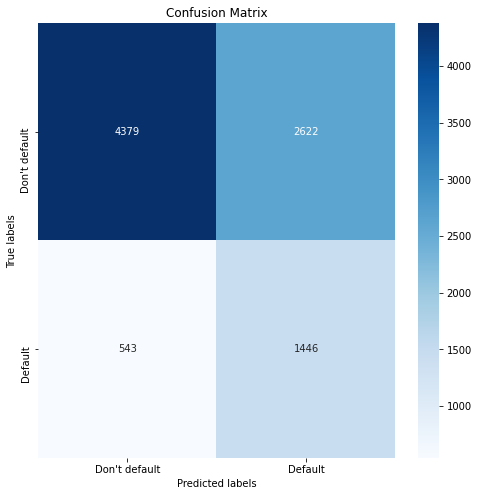

In [37]:
evaluate_model("GaussianNB()", GaussianNB())

For BernoulliNB:

1. time elapsed: 0:00:00.013166
2. Accuracy_score: 0.68254
3. Classification report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      7001
           1       0.33      0.42      0.37      1989

    accuracy                           0.68      8990
   macro avg       0.58      0.59      0.58      8990
weighted avg       0.71      0.68      0.70      8990

4. AUC: 0.63845
5.

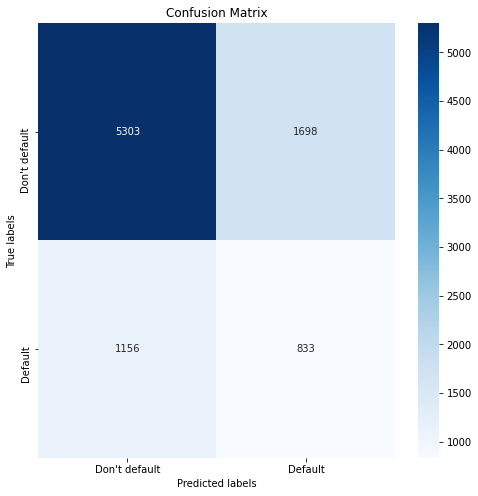

In [38]:
evaluate_model("BernoulliNB", BernoulliNB())

<a id="6"></a>
## 6. Conclusion